Trabalhando com planilhas 

In [2]:
import pandas as pd


In [56]:
df1 = pd.read_excel("/content/drive/MyDrive/Desafio DIO/Dataset desafio DIO pandas /datasets/Aracaju.xlsx")
df2 = pd.read_excel("/content/drive/MyDrive/Desafio DIO/Dataset desafio DIO pandas /datasets/Fortaleza.xlsx")
df3 = pd.read_excel("/content/drive/MyDrive/Desafio DIO/Dataset desafio DIO pandas /datasets/Natal.xlsx")
df4 = pd.read_excel("/content/drive/MyDrive/Desafio DIO/Dataset desafio DIO pandas /datasets/Recife.xlsx")
df5 = pd.read_excel("/content/drive/MyDrive/Desafio DIO/Dataset desafio DIO pandas /datasets/Salvador.xlsx")

In [57]:
df = pd.concat([df1,df2,df3,df4,df5])

In [58]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [59]:
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [60]:
df.sample(5)#amostra

,Cidade,Data,Vendas,LojaID,Qtde
57,Salvador,2019-01-01,11.72,1035,1
114,Recife,2019-03-02,16.82,983,4
19,Aracaju,2018-01-01,43.96,1520,9
193,Natal,2019-01-02,3.97,1036,2
32,Recife,2019-01-01,15.93,982,7


In [61]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [62]:
df["LojaID"] = df["LojaID"].astype("object")#mudar tipo para object

Tratamento de dados 

In [63]:
df.isnull().sum()#soma os valores nulos 

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [64]:
df["Vendas"].fillna(df["Vendas"].mean(),inplace=True)#substitui valores nulos pela média

In [65]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
64,Fortaleza,2019-01-01,110.31,1005,4
105,Fortaleza,2019-01-01,174.66,1004,1
181,Salvador,2019-01-02,244.83,1037,2
210,Natal,2019-01-02,197.64,1035,1
17,Salvador,2019-02-14,158.66,1037,1
19,Recife,2019-01-01,199.43,983,7
45,Natal,2019-03-11,431.00,852,3
127,Fortaleza,2019-03-02,39.56,982,8
13,Salvador,2019-02-12,39.29,1035,1
42,Fortaleza,2019-01-01,38.71,1004,5


In [66]:
df["Vendas"].mean() #valor médio de vendas totais 

122.61180089485458

In [67]:
df["Vendas"].fillna(0,inplace=True) #substitui valores nulos por zero

In [68]:
df.dropna(inplace=True)#remove linhas com valores nulos com base apenas em 1 coluna

In [69]:
df.dropna(subset=["Vendas"], inplace=True)#apaga linhas com valores nulos com base apenas em 1 coluna

In [70]:
df.dropna(how="all", inplace=True)

Criando colunas novas 

In [71]:
df["Receita"] = df["Vendas"].mul(df["Qtde"])#criando uma coluna receita

In [72]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [73]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [74]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [75]:
df["Receita"].max()#maior receita

3544.0

In [76]:
df["Receita"].min()#menor receita

3.34

In [77]:
df.nlargest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [78]:
df.nsmallest(3,"Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [79]:
df.groupby("Cidade")["Receita"].sum() #agrupamento por cidade

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [80]:
df.sort_values("Receita", ascending=False).head(10)#ordenando o conjunto de dados 

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


Trabalhando com datas

In [81]:
df["Data"] = pd.to_datetime(df["Data"])#transformando coluna data em data

In [82]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [83]:
df.groupby(df["Data"].dt.year)["Receita"].sum()#nova coluna ano

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [84]:
df["Ano_Venda"] = df["Data"].dt.year #nova coluna com ano 

In [85]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
162,Natal,2019-01-02,23.08,1036,2,46.16,2.0,2019
197,Natal,2019-01-02,10.45,1036,2,20.90,2.0,2019
79,Fortaleza,2019-01-01,41.25,1005,6,247.50,6.0,2019
103,Aracaju,2018-01-01,12.62,1522,3,37.86,3.0,2018
73,Natal,2018-01-05,773.00,852,2,1546.00,2.0,2018


In [86]:
df["mes_venda"],df["dia_venda"]=(df["Data"].dt.month,df["Data"].dt.day)

In [87]:
df["Data"].min()#data mais antiga

Timestamp('2018-01-01 00:00:00')

In [88]:
df["diferenca_dias"] = df["Data"] - df["Data"].min()#diferença de dias 

In [89]:
df.sample(2)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias
216,Natal,2019-01-02,5.82,1035,1,5.82,1.0,2019,1,2,366 days
42,Fortaleza,2019-01-01,38.71,1004,5,193.55,5.0,2019,1,1,365 days


In [90]:
df["trimestre_venda"] = df["Data"].dt.quarter #coluna de trimestre 

In [91]:
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019)&(df["Data"].dt.month == 3)]

In [92]:
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


In [93]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

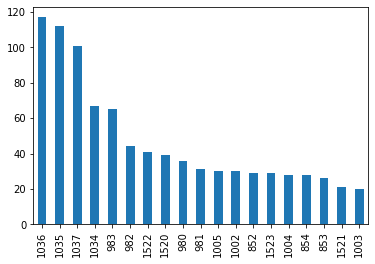

In [94]:
df["LojaID"].value_counts(ascending=False).plot.bar()#gráfico de barras

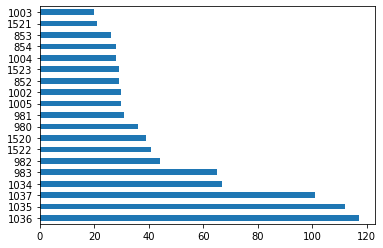

In [95]:
df["LojaID"].value_counts().plot.barh()#gráfico de barras horizontais 

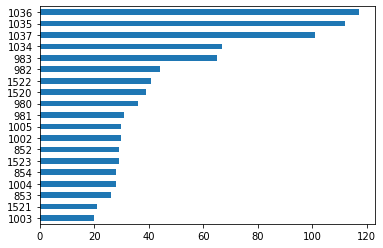

In [96]:
df["LojaID"].value_counts(ascending=True).plot.barh();

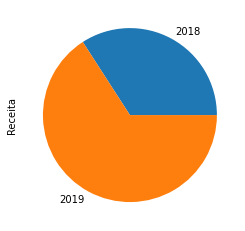

In [97]:
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie()

In [98]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

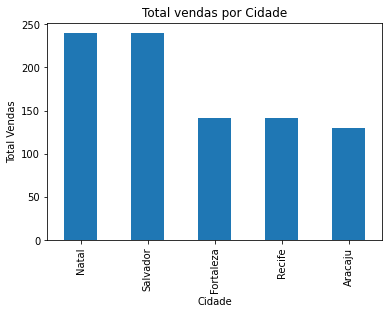

In [99]:
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

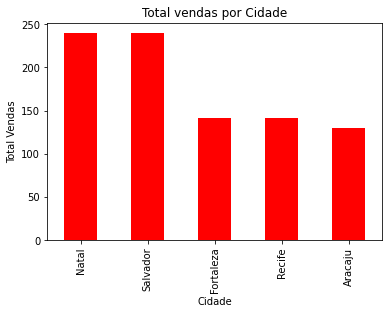

In [100]:
df["Cidade"].value_counts().plot.bar(title="Total vendas por Cidade", color="red")
plt.xlabel("Cidade")
plt.ylabel("Total Vendas");

In [102]:
plt.style.use("ggplot")

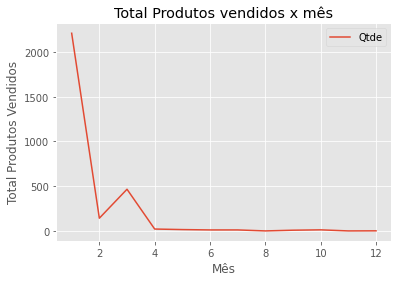

In [103]:
df.groupby(df["mes_venda"])["Qtde"].sum().plot(title = "Total Produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

In [104]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [105]:
df.groupby(df["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [107]:
df_2019 = df[df["Ano_Venda"] == 2019]

In [108]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum()

mes_venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

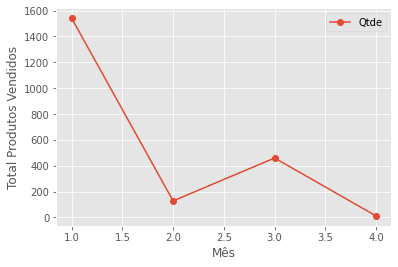

In [109]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos")
plt.legend();

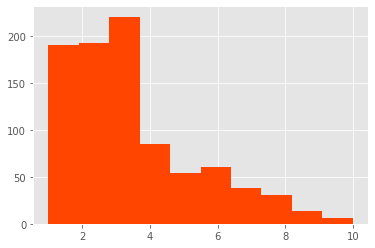

In [110]:
plt.hist(df["Qtde"], color="orangered");

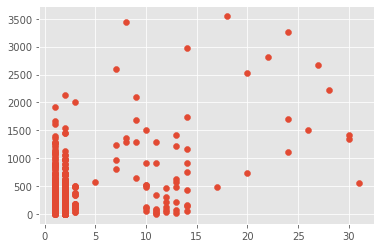

In [111]:
plt.scatter(x=df_2019["dia_venda"], y = df_2019["Receita"]);

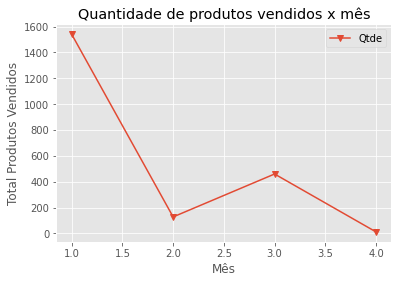

In [112]:
df_2019.groupby(df_2019["mes_venda"])["Qtde"].sum().plot(marker = "v")
plt.title("Quantidade de produtos vendidos x mês")
plt.xlabel("Mês")
plt.ylabel("Total Produtos Vendidos");
plt.legend()
plt.savefig("grafico QTDE x MES.png")

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [114]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [115]:
df = pd.read_excel("AdventureWorks.xlsx")

In [116]:
df["Valor Venda"].sum()

5984606.1426

In [117]:
df["custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando a coluna de custo

In [118]:
round(df["custo"].sum(), 2) #custo total 

2486783.05

In [119]:
df["lucro"]  = df["Valor Venda"] - df["custo"]

In [120]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [123]:
round(df["lucro"].sum(),2)

3497823.09

In [124]:
df["Tempo_envio"] = df["Data Envio"] - df["Data Venda"]

In [125]:
df["Tempo_envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [ ]:
df["Tempo_envio"].dtype

In [126]:
df.groupby("Marca")["Tempo_envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [127]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
custo             0
lucro             0
Tempo_envio       0
dtype: int64

In [128]:
df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: lucro, dtype: float64

In [129]:
pd.options.display.float_format = '{:20,.2f}'.format

In [130]:
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [131]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

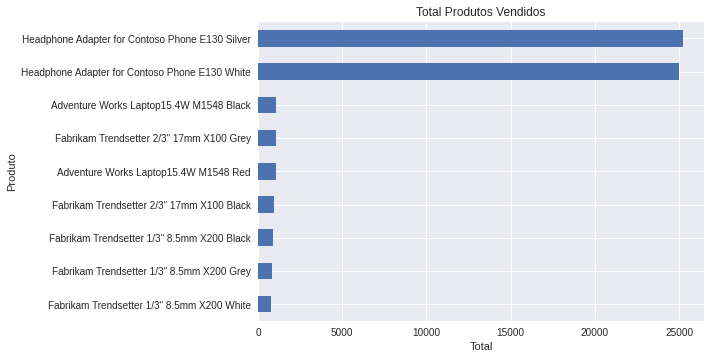

In [132]:
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

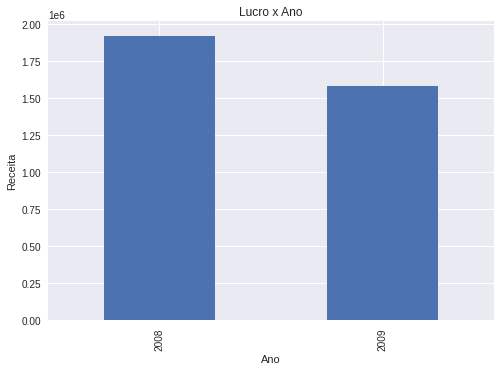

In [133]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");

In [134]:
df.groupby(df["Data Venda"].dt.year)["lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: lucro, dtype: float64

In [135]:
df_2009 = df[df["Data Venda"].dt.year == 2009]

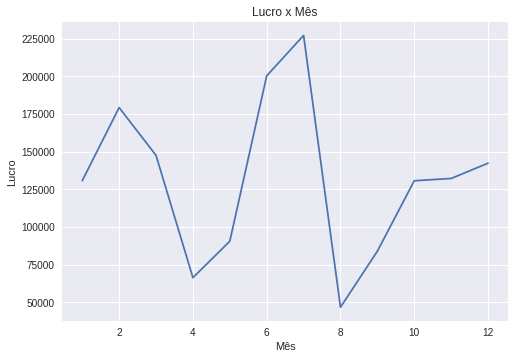

In [136]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

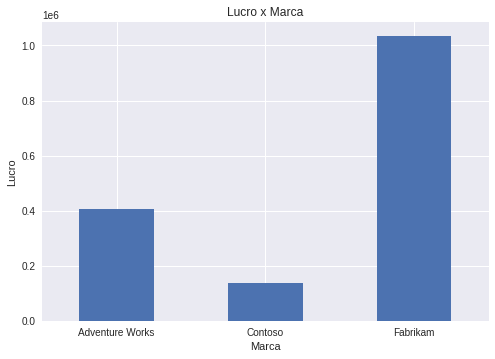

In [137]:
df_2009.groupby("Marca")["lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

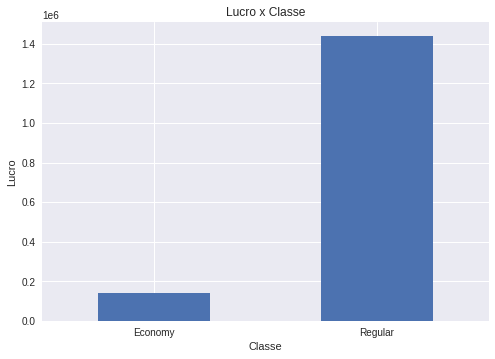

In [138]:
df_2009.groupby("Classe")["lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

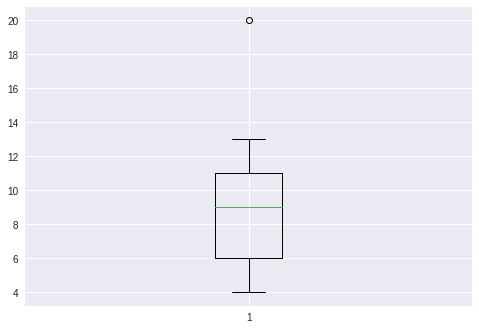

In [139]:
plt.boxplot(df["Tempo_envio"]);

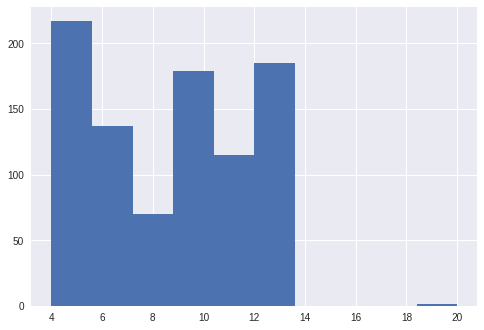

In [140]:
plt.hist(df["Tempo_envio"]);

In [141]:
df["Tempo_envio"].min()

4

In [142]:
df['Tempo_envio'].max()

20

In [143]:
df[df["Tempo_envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Tempo_envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [144]:
df.to_csv("df_vendas_novo.csv", index=False)